In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
df.shape

(23, 2)

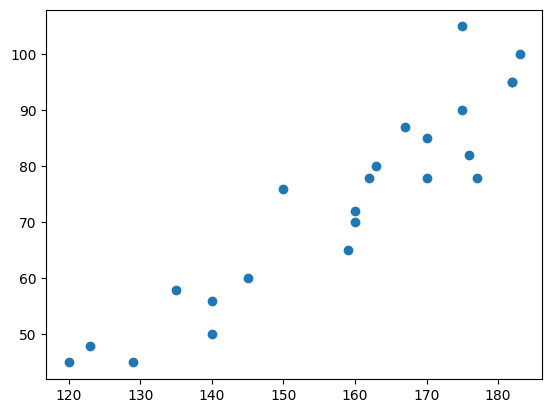

In [5]:
plt.scatter(df['Height'],df['Weight'])

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


<Axes: >

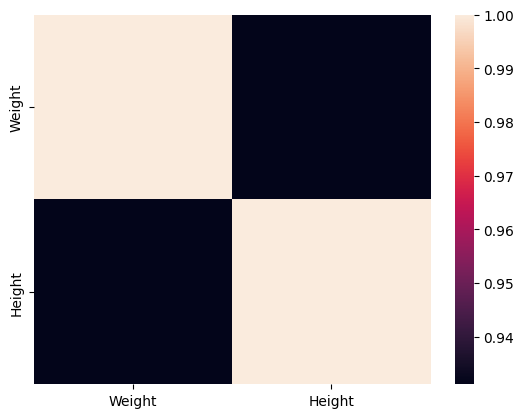

In [7]:
sns.heatmap(df.corr())

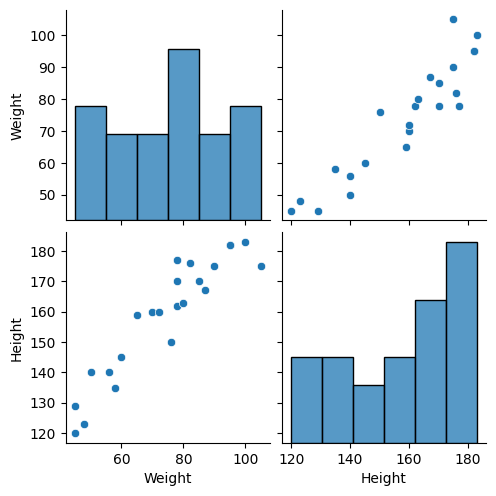

In [8]:
sns.pairplot(df)

In [ ]:
x=df[['Weight']]  
y=df['Height']

In [13]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)  #standardization is applied to x only
x_test=scaler.transform(x_test)

In [27]:
x_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [31]:
print('The slope of the line is:',reg.coef_)
print('The intercept of the line is:',reg.intercept_)

The slope of the line is: [17.2982057]
The intercept of the line is: 156.47058823529412


In [32]:
y_pred=reg.predict(x_test)

In [33]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [34]:
from sklearn.metrics import mean_squared_error,r2_score
print('The mean squared error is:',mean_squared_error(y_test,y_pred))
print('The r2_score is:',r2_score(y_test,y_pred))

The mean squared error is: 114.84069295228699
The r2_score is: 0.7360826717981276


In [41]:
reg.predict(scaler.transform([[95]]))

c:\Users\vatsa\Downloads\KrishNaikML\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([180.07972266])

In [38]:
#using OLS method
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()
predictions=model.predict(x_test)

In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 15 Mar 2025   Prob (F-statistic):                       0.664
Time:                        01:08:11   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\vatsa\Downloads\KrishNaikML\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)
